In [1]:
import os
print(os.getcwd())


/Users/fadiya


In [3]:
print(os.getcwd())

/Users/fadiya/Documents/cyclone


In [4]:
!pip install numpy pandas xarray netCDF4 cdsapi scikit-learn matplotlib seaborn


In [5]:
import cdsapi

In [6]:
c = cdsapi.Client()
print("cdsapi is working")

2025-04-16 16:30:35,688 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-04-16 16:30:35,689 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.


cdsapi is working


In [7]:


os.makedirs('./data', exist_ok=True)


c = cdsapi.Client()

# Send the download request 
c.retrieve(
    'reanalysis-era5-pressure-levels',  
    {
        'product_type': 'reanalysis',
        'format': 'netcdf',  # The format for downloading
        'variable': [
            'vorticity',  # Vorticity at 850hPa
            'relative_humidity',  # Relative humidity at 600hPa
            'u_component_of_wind',  # U-wind (east-west wind)
            'v_component_of_wind'  # V-wind (north-south wind)
        ],
        'pressure_level': ['850', '600', '200'],  
        'year': '2005',  
        'month': ['06', '07', '08'], 
        'day': [f"{i:02d}" for i in range(1, 32)], 
        'time': ['00:00', '06:00', '12:00', '18:00'],  # Time intervals (6-hourly)
        'area': [30, 100, 0, 180],  # Geographical region (Western North Pacific)
    },
    './data/era_2005_jja.nc'  
)


2025-04-16 16:30:39,603 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-04-16 16:30:39,604 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-04-16 16:30:40,527 INFO Request ID is 69943166-080d-48de-971e-953cf8733e46
2025-04-16 16:30:40,887 INFO status has been updated to accepted
2025-04-16 16:30:55,711 INFO status has been updated to successful


d04ea9bee74dc06006df9e95b6489bf3.nc:   0%|          | 0.00/357M [00:00<?, ?B/s]

'./data/era_2005_jja.nc'

In [19]:
pip install xarray matplotlib netCDF4

Note: you may need to restart the kernel to use updated packages.


In [20]:
import xarray as xr
import matplotlib.pyplot as plt

In [21]:
dataset=xr.open_dataset('./data/era_2005_jja.nc')
print(dataset)

<xarray.Dataset>
Dimensions:         (valid_time: 368, pressure_level: 3, latitude: 121,
                     longitude: 321)
Coordinates:
  * valid_time      (valid_time) datetime64[ns] 2005-06-01 ... 2005-08-31T18:...
  * pressure_level  (pressure_level) float64 850.0 600.0 200.0
  * latitude        (latitude) float64 30.0 29.75 29.5 29.25 ... 0.5 0.25 0.0
  * longitude       (longitude) float64 100.0 100.2 100.5 ... 179.5 179.8 180.0
Data variables:
    number          int64 ...
    expver          (valid_time) object ...
    vo              (valid_time, pressure_level, latitude, longitude) float32 ...
    r               (valid_time, pressure_level, latitude, longitude) float32 ...
    u               (valid_time, pressure_level, latitude, longitude) float32 ...
    v               (valid_time, pressure_level, latitude, longitude) float32 ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCen

In [22]:
print(dataset.variables)

Frozen({'number': <xarray.Variable ()>
[1 values with dtype=int64]
Attributes:
    long_name:      ensemble member numerical id
    units:          1
    standard_name:  realization, 'valid_time': <xarray.IndexVariable 'valid_time' (valid_time: 368)>
array(['2005-06-01T00:00:00.000000000', '2005-06-01T06:00:00.000000000',
       '2005-06-01T12:00:00.000000000', ..., '2005-08-31T06:00:00.000000000',
       '2005-08-31T12:00:00.000000000', '2005-08-31T18:00:00.000000000'],
      dtype='datetime64[ns]')
Attributes:
    long_name:      time
    standard_name:  time, 'pressure_level': <xarray.IndexVariable 'pressure_level' (pressure_level: 3)>
array([850., 600., 200.])
Attributes:
    long_name:         pressure
    units:             hPa
    positive:          down
    stored_direction:  decreasing
    standard_name:     air_pressure, 'latitude': <xarray.IndexVariable 'latitude' (latitude: 121)>
array([30.  , 29.75, 29.5 , 29.25, 29.  , 28.75, 28.5 , 28.25, 28.  , 27.75,
       27.5 , 27.2

In [23]:
vorticity=dataset['vo']
print(vorticity)


<xarray.DataArray 'vo' (valid_time: 368, pressure_level: 3, latitude: 121,
                        longitude: 321)>
[42880464 values with dtype=float32]
Coordinates:
  * valid_time      (valid_time) datetime64[ns] 2005-06-01 ... 2005-08-31T18:...
  * pressure_level  (pressure_level) float64 850.0 600.0 200.0
  * latitude        (latitude) float64 30.0 29.75 29.5 29.25 ... 0.5 0.25 0.0
  * longitude       (longitude) float64 100.0 100.2 100.5 ... 179.5 179.8 180.0
Attributes: (12/32)
    GRIB_paramId:                             138
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      38841
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               s**-1
    long_name:                                Vor

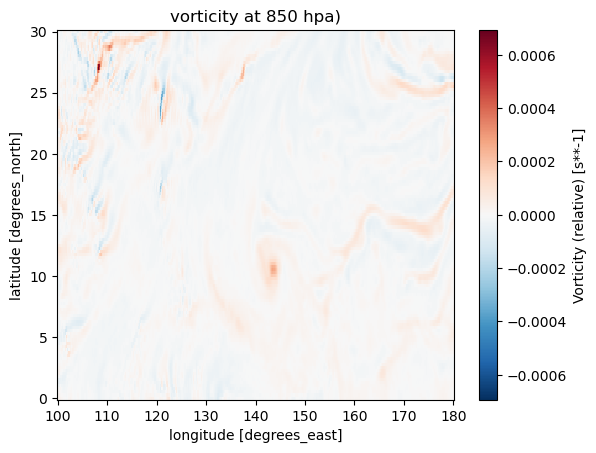

In [24]:
vorticity[0,0,:,:].plot()
plt.title('vorticity at 850 hpa)')
plt.show()

In [25]:
relative_humidity=dataset['r']
print(relative_humidity)


<xarray.DataArray 'r' (valid_time: 368, pressure_level: 3, latitude: 121,
                       longitude: 321)>
[42880464 values with dtype=float32]
Coordinates:
  * valid_time      (valid_time) datetime64[ns] 2005-06-01 ... 2005-08-31T18:...
  * pressure_level  (pressure_level) float64 850.0 600.0 200.0
  * latitude        (latitude) float64 30.0 29.75 29.5 29.25 ... 0.5 0.25 0.0
  * longitude       (longitude) float64 100.0 100.2 100.5 ... 179.5 179.8 180.0
Attributes: (12/32)
    GRIB_paramId:                             157
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      38841
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               %
    long_name:                                Relative 

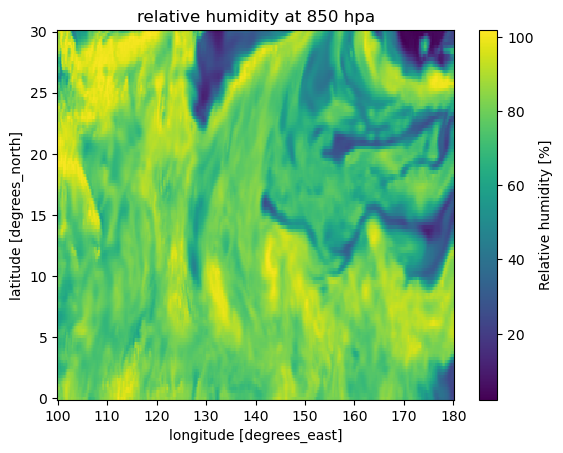

In [26]:
relative_humidity[0,0,:,:].plot()
plt.title('relative humidity at 850 hpa')
plt.show()

In [16]:
u_component=dataset['u']
print(u_component)

<xarray.DataArray 'u' (valid_time: 368, pressure_level: 3, latitude: 121,
                       longitude: 321)>
[42880464 values with dtype=float32]
Coordinates:
  * valid_time      (valid_time) datetime64[ns] 2005-06-01 ... 2005-08-31T18:...
  * pressure_level  (pressure_level) float64 850.0 600.0 200.0
  * latitude        (latitude) float64 30.0 29.75 29.5 29.25 ... 0.5 0.25 0.0
  * longitude       (longitude) float64 100.0 100.2 100.5 ... 179.5 179.8 180.0
Attributes: (12/32)
    GRIB_paramId:                             131
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      38841
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               m s**-1
    long_name:                                U c

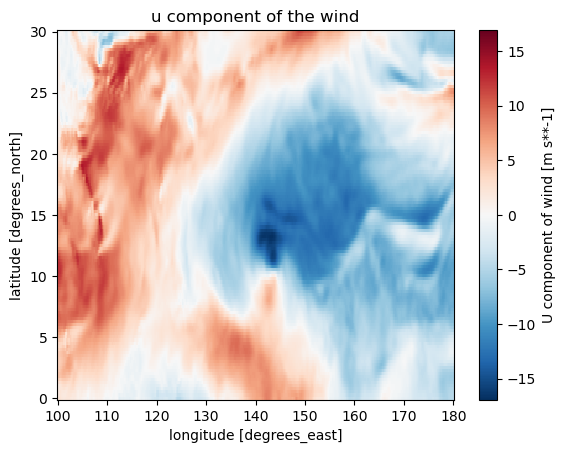

In [17]:
u_component[0,0,:,:].plot()
plt.title('u component of the wind')
plt.show()

In [18]:
print(variables)

NameError: name 'variables' is not defined

In [ ]:
print(dataset.variables)

In [ ]:
vorticity[0,1,:,:].plot()
plt.title('vorticity at 600 hpa)')
plt.show()

In [27]:
relative_humidity=dataset['r']
rh_850 = relative_humidity.sel(pressure_level=850)
rh_850_mean= rh_850.mean(dim=['latitude','longitude'])


<function matplotlib.pyplot.show(close=None, block=None)>

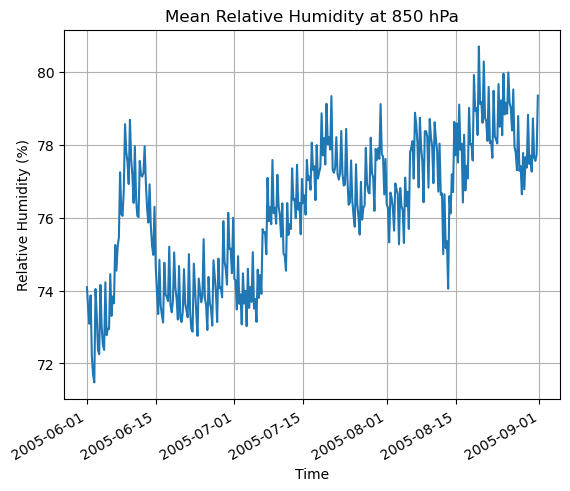

In [28]:
rh_850_mean.plot()
plt.title('Mean Relative Humidity at 850 hPa')
plt.ylabel('Relative Humidity (%)')
plt.xlabel('Time')
plt.grid(True)
plt.show